In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#Defining function for heat capacity of a metal at low temperature
def heat(T, gamma, beta):
    return gamma*T + beta*T**3
def C_over_T(T, gamma, beta):
    return gamma + beta*T**2

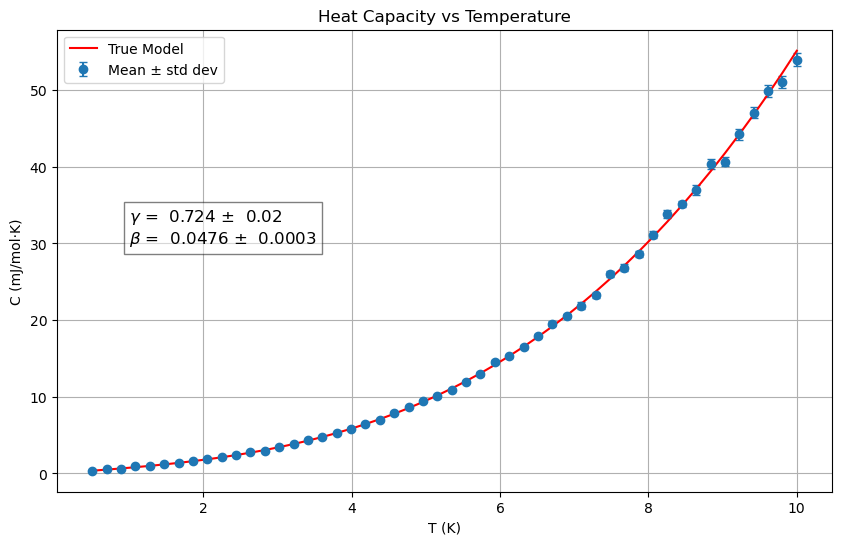

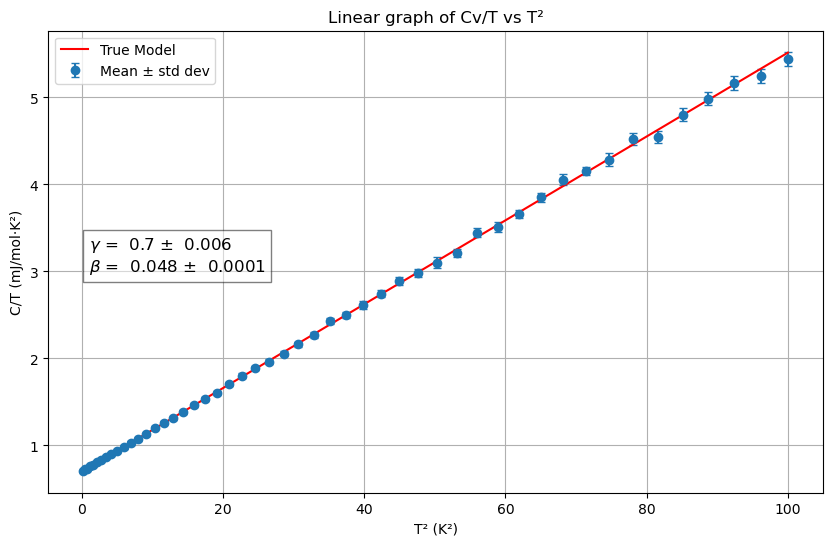

In [14]:
#Original model of gaussian noise W/ added noise in temp. measure
gamma = 0.695
beta = 4.82E-2
n= 50
T = np.linspace(0.5, 10, n)


Cv_mean = []
Cv_std = []

CvT_mean = []
CvT_std = []

# Simulate measurements
for i in T:
    T_exp = i + np.random.normal(0, 0.05)
    C = heat(T_exp, gamma, beta)
    Cv = C + np.random.normal(0, 0.015*C, n)    
    CvT = Cv/T_exp

    Cv_mean.append(Cv.mean())
    Cv_std.append(Cv.std())
    CvT_mean.append(CvT.mean())
    CvT_std.append(CvT.std())
    
# Set up arrays
T = np.array(T)
T_square = np.array(T)**2
Cv_mean = np.array(Cv_mean)
Cv_std = np.array(Cv_std)
CvT_mean = np.array(CvT_mean)
CvT_std = np.array(CvT_std)

#Curve Fits
popt1, pcov1 = curve_fit(heat, T, Cv_mean, p0 = [.5, .05])
popt2, pcov2 = curve_fit(C_over_T, T, CvT_mean, p0 = [.5, .5])

gamma1_fit, beta1_fit = popt1
gamma1_err, beta1_err = np.sqrt(np.diag(pcov1))

gamma2_fit, beta2_fit = popt2
gamma2_err, beta2_err = np.sqrt(np.diag(pcov2))

plt.figure(figsize=(10, 6))
plt.errorbar(T, Cv_mean, yerr=Cv_std, fmt='o', capsize=3, label="Mean ± std dev")
plt.plot(T, heat(T, gamma, beta), label="True Model", color='red')
plt.xlabel("T (K)")
plt.ylabel("C (mJ/mol·K)")
plt.title("Heat Capacity vs Temperature")
fit_text = f'$\\gamma$ = {gamma1_fit: .3} ± {gamma1_err: .1}\n$\\beta$ = {beta1_fit: .3} ± {beta1_err: .1}'
plt.text(1, 30, fit_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor = 'black'))
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.errorbar(T_square, CvT_mean, yerr=CvT_std, fmt='o', capsize=3, label="Mean ± std dev")
plt.plot(T**2, heat(T, gamma, beta)/T, label="True Model", color='red')
plt.xlabel("T\u00b2 (K\u00b2)")
plt.ylabel("C/T (mJ/mol·K\u00b2)")
plt.title("Linear graph of Cv/T vs T\u00b2")
fit_text = f'$\\gamma$ = {gamma2_fit: .3} ± {gamma2_err: .1}\n$\\beta$ = {beta2_fit: .3} ± {beta2_err: .1}'
plt.text(1, 3, fit_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor = 'black'))
plt.grid(True)
plt.legend()
plt.show()

In [15]:
residuals1 = Cv_mean - heat(T, *popt1)
chi_squared1 = np.sum((residuals1 / Cv_std) ** 2)
dof1 = len(Cv_mean) - len(popt1)
reduced_chi_squared1 = chi_squared1 / dof1

print(f"Chi-squared (Cv): {chi_squared1:.2f}")
print(f"Reduced Chi-squared (Cv): {reduced_chi_squared1:.2f}")

# C_over_T fit
residuals2 = CvT_mean - C_over_T(T, *popt2)
chi_squared2 = np.sum((residuals2 / CvT_std) ** 2)
dof2 = len(CvT_mean) - len(popt2)
reduced_chi_squared2 = chi_squared2 / dof2

print(f"Chi-squared (Cv/T): {chi_squared2:.2f}")
print(f"Reduced Chi-squared (Cv/T): {reduced_chi_squared2:.2f}")

Chi-squared (Cv): 174.87
Reduced Chi-squared (Cv): 3.64
Chi-squared (Cv/T): 16.36
Reduced Chi-squared (Cv/T): 0.34


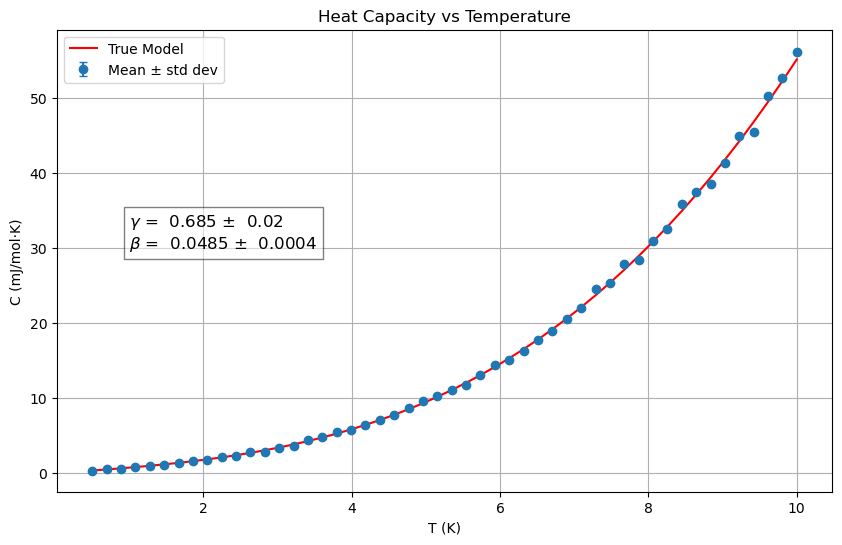

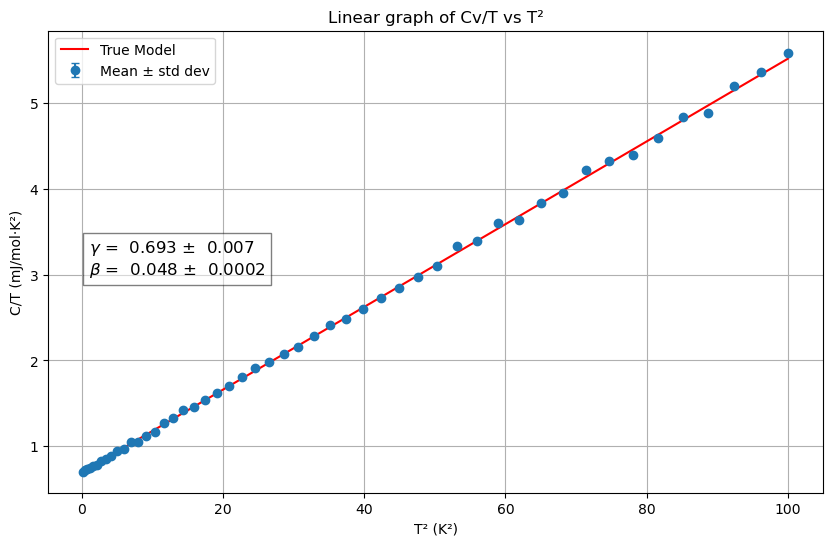

In [16]:
#Original model of gaussian noise W/ added noise in temp. measure
gamma = 0.695
beta = 4.82E-2
n= 50
T = np.linspace(0.5, 10, n)


Cv_mean = []
Cv_std = []

CvT_mean = []
CvT_std = []

# Simulate measurements
for i in T:
    T_exp = i + np.random.normal(0, 0.05)
    C = heat(T_exp, gamma, beta)
    Cv = C + np.random.normal(0, 0.015*C, n)    
    CvT = Cv/T_exp

    Cv_mean.append(Cv.mean())
    Cv_std.append(Cv.std()/np.sqrt(n))
    CvT_mean.append(CvT.mean())
    CvT_std.append(CvT.std()/np.sqrt(n))
    
# Set up arrays
T = np.array(T)
T_square = np.array(T)**2
Cv_mean = np.array(Cv_mean)
Cv_std = np.array(Cv_std)
CvT_mean = np.array(CvT_mean)
CvT_std = np.array(CvT_std)

#Curve Fits
popt1, pcov1 = curve_fit(heat, T, Cv_mean, p0 = [.5, .05])
popt2, pcov2 = curve_fit(C_over_T, T, CvT_mean, p0 = [.5, .5])

gamma1_fit, beta1_fit = popt1
gamma1_err, beta1_err = np.sqrt(np.diag(pcov1))

gamma2_fit, beta2_fit = popt2
gamma2_err, beta2_err = np.sqrt(np.diag(pcov2))

plt.figure(figsize=(10, 6))
plt.errorbar(T, Cv_mean, yerr=Cv_std, fmt='o', capsize=3, label="Mean ± std dev")
plt.plot(T, heat(T, gamma, beta), label="True Model", color='red')
plt.xlabel("T (K)")
plt.ylabel("C (mJ/mol·K)")
plt.title("Heat Capacity vs Temperature")
fit_text = f'$\\gamma$ = {gamma1_fit: .3} ± {gamma1_err: .1}\n$\\beta$ = {beta1_fit: .3} ± {beta1_err: .1}'
plt.text(1, 30, fit_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor = 'black'))
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.errorbar(T_square, CvT_mean, yerr=CvT_std, fmt='o', capsize=3, label="Mean ± std dev")
plt.plot(T**2, heat(T, gamma, beta)/T, label="True Model", color='red')
plt.xlabel("T\u00b2 (K\u00b2)")
plt.ylabel("C/T (mJ/mol·K\u00b2)")
plt.title("Linear graph of Cv/T vs T\u00b2")
fit_text = f'$\\gamma$ = {gamma2_fit: .3} ± {gamma2_err: .1}\n$\\beta$ = {beta2_fit: .3f} ± {beta2_err: .1}'
plt.text(1, 3, fit_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor = 'black'))
plt.grid(True)
plt.legend()
plt.show()

In [17]:
residuals1 = Cv_mean - heat(T, *popt1)
chi_squared1 = np.sum((residuals1 / Cv_std) ** 2)
dof1 = len(Cv_mean) - len(popt1)
reduced_chi_squared1 = chi_squared1 / dof1

print(f"Chi-squared (Cv): {chi_squared1:.2f}")
print(f"Reduced Chi-squared (Cv): {reduced_chi_squared1:.2f}")

# C_over_T fit
residuals2 = CvT_mean - C_over_T(T, *popt2)
chi_squared2 = np.sum((residuals2 / CvT_std) ** 2)
dof2 = len(CvT_mean) - len(popt2)
reduced_chi_squared2 = chi_squared2 / dof2

print(f"Chi-squared (Cv/T): {chi_squared2:.2f}")
print(f"Reduced Chi-squared (Cv/T): {reduced_chi_squared2:.2f}")

Chi-squared (Cv): 10248.36
Reduced Chi-squared (Cv): 213.51
Chi-squared (Cv/T): 1590.89
Reduced Chi-squared (Cv/T): 33.14


In [18]:
from scipy.constants import pi, R

beta = popt1[1]*1e-3
beta_err = np.sqrt(pcov1[1, 1]) * 1e-3
A = ((12 * pi**4 * R) / 5) ** (1/3)

T_D = A * beta ** (-1/3)
T_D_err = (1/3) * A * beta ** (-4/3) * beta_err

print(f"Debye temperature: {T_D:.2f} ± {T_D_err:.2f} K")

Debye temperature: 342.11 ± 0.86 K


In [19]:
from scipy.constants import pi, R

beta = popt2[1] * 1e-3
beta_err = np.sqrt(pcov2[1, 1]) * 1e-3
A = ((12 * pi**4 * R) / 5) ** (1/3)

T_D = A * beta ** (-1/3)
T_D_err = (1/3) * A * beta ** (-4/3) * beta_err

print(f"Debye temperature: {T_D:.2f} ± {T_D_err:.2f} K")

Debye temperature: 342.60 ± 0.36 K
